In [36]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
# mediapipe to extract keypoints and values from the hand regions
import mediapipe as mp

In [37]:
# pip install opencv-python

In [38]:
# pip install tensorflow

In [39]:
# pip install scikit-learn

In [40]:
#pip install mediapipe

## Keypoints using Mediapipe holistic 

In [41]:
# mediapipe holistic for downloading and leveraging the model
mpHolistic = mp.solutions.holistic

# mediapipe drawing utilities for drawing the keypoints on the face and hands
mpDrawing = mp.solutions.drawing_utils


# title to show on the window
title = 'Hand Gesture Recognition using LSTM DL model'

In [42]:
# read the image and make predictions
def mpDetection(image, model):
    
    # convert BGR image format into RGB as open-cv reads the image data in RGB, however, mediapipe detects image in RGB format
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # make the image unwritable for saving the memory consumption
    image.flags.writeable = False
    
    # make the prediction using mediapipe
    results = model.process(image)
    
    # make the image writable
    image.flags.writeable = True
    
    # again, convert the image format into original ==> RGB to BGR
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [43]:
# draw the landmarks on the face and hands

def drawLandmarks(image, results):
    # mpDrawing.draw_landmarks(image, results.face_landmarks, mpHolistic.FACE_CONNECTIONS)
    # draw the landmarks by passing image, landmarks and connections in the draw_landmarks function
    mpDrawing.draw_landmarks(image, results.pose_landmarks, mpHolistic.POSE_CONNECTIONS)
    mpDrawing.draw_landmarks(image, results.left_hand_landmarks, mpHolistic.HAND_CONNECTIONS)
    mpDrawing.draw_landmarks(image, results.right_hand_landmarks, mpHolistic.HAND_CONNECTIONS)


In [44]:
# add colors on the landmarks
def drawColorfulLandmarks(image, results):
    
    
    # add grey color on the pose (between wrist and shoulder)
    mpDrawing.draw_landmarks(image, results.pose_landmarks, mpHolistic.POSE_CONNECTIONS, 
                               mpDrawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mpDrawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                            )
    # add pink color on the landmarks of the left hand
    mpDrawing.draw_landmarks(image, results.left_hand_landmarks, mpHolistic.HAND_CONNECTIONS, 
                              mpDrawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mpDrawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                            )
    
    # add blue color on the landmarks of the right hand
    mpDrawing.draw_landmarks(image, results.right_hand_landmarks, mpHolistic.HAND_CONNECTIONS, 
                               mpDrawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mpDrawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                            )
    

In [45]:
# capture camera
cap = cv2.VideoCapture(0) 
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# set the mediapipe model
with mpHolistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # loop the frames of the webcam
    while cap.isOpened():
        # read the frame/image from the webcam
        ret, frame = cap.read()

        # make the detection
        image, results = mpDetection(frame, holistic)
        # print(results)
        
        # draw the landmarks
        drawColorfulLandmarks(image, results)


        # check if the frame was read successfully
        if not ret:
            print("Error: Could not read frame.")
            break

        # show the window
        cv2.imshow('Hand Gesture Recognition System with LSTM', image)

        # break the loop when 'q' key is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
                break

# release the webcam
cap.release()

# close all OpenCV windows
cv2.destroyAllWindows()

In [46]:
results.face_landmarks.landmark

[x: 0.53115356
y: 0.62019837
z: -0.032641105
, x: 0.53040534
y: 0.5705351
z: -0.051103994
, x: 0.5313706
y: 0.58913785
z: -0.029358724
, x: 0.52320975
y: 0.52954483
z: -0.03414343
, x: 0.53036535
y: 0.55605614
z: -0.05322621
, x: 0.5307445
y: 0.5393575
z: -0.04813355
, x: 0.5321281
y: 0.50264907
z: -0.018386984
, x: 0.4673594
y: 0.5114106
z: 0.022743504
, x: 0.53278226
y: 0.47468874
z: -0.009264678
, x: 0.53296006
y: 0.45702523
z: -0.009347429
, x: 0.53404987
y: 0.39484793
z: 0.0076464447
, x: 0.53112745
y: 0.6272356
z: -0.031788394
, x: 0.531281
y: 0.63301724
z: -0.028888697
, x: 0.5315424
y: 0.6356803
z: -0.025016366
, x: 0.5314271
y: 0.6382267
z: -0.025731001
, x: 0.531324
y: 0.64343244
z: -0.02776183
, x: 0.5312051
y: 0.6505575
z: -0.030423012
, x: 0.5312052
y: 0.65907234
z: -0.030068945
, x: 0.5314039
y: 0.6758573
z: -0.022430662
, x: 0.5306835
y: 0.57905424
z: -0.046901602
, x: 0.5226201
y: 0.5804978
z: -0.034054253
, x: 0.4394058
y: 0.4713607
z: 0.07461148
, x: 0.49303877
y: 0.5

In [47]:
mpHolistic.HAND_CONNECTIONS

frozenset({(0, 1),
           (0, 5),
           (0, 17),
           (1, 2),
           (2, 3),
           (3, 4),
           (5, 6),
           (5, 9),
           (6, 7),
           (7, 8),
           (9, 10),
           (9, 13),
           (10, 11),
           (11, 12),
           (13, 14),
           (13, 17),
           (14, 15),
           (15, 16),
           (17, 18),
           (18, 19),
           (19, 20)})

In [48]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [49]:

print('Face landmarks number: ', len(results.face_landmarks.landmark) )  # 468

print('Pose landmarks number: ', len(results.pose_landmarks.landmark) )  # 33

print('Right landmarks number: ', len(results.right_hand_landmarks.landmark) )  # 21

# print('Left landmarks number: ', len(results.left_hand_landmarks.landmark) )  # 21



Face landmarks number:  468
Pose landmarks number:  33
Right landmarks number:  21


## Extrack keypoint values

In [50]:
results.pose_landmarks.landmark
print('Length of the pose_landmarks: ', len(results.pose_landmarks.landmark))

Length of the pose_landmarks:  33


In [51]:
# store the x,y,z and visibility in the list of the array
pose = []

for res in results.pose_landmarks.landmark:
    pose.append(np.array([res.x, res.y, res.z, res.visibility]))
    
print(len(pose))

if(len(pose) == len(results.pose_landmarks.landmark)):
    print('Stored x,y,z and visibility in the list of the array as "pose"')
else:
    print('Not stored pose values completely')

33
Stored x,y,z and visibility in the list of the array as "pose"


In [52]:
pose_data = []

# check if pose landmarks are present in the results
if results.pose_landmarks:
    # extract x, y, z, and visibility for each pose landmark
    for landmark in results.pose_landmarks.landmark:
        pose_data.extend([landmark.x, landmark.y, landmark.z, landmark.visibility])
else:
    # if no pose landmarks are present, set pose_data to zeros
    pose_data = np.zeros(132)

# convert pose_data to a NumPy array
pose = np.array(pose_data)

len(pose)

132

#### Same thing for the left, right hands and face  landmarks

In [53]:

# mutiple the set of the landmarks by flatten() and if the left hand is not on the frame, then store 0 value where 21 = length  and 3 = x,y,z values
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
print('Length of the left hand landmarks', len(lh))

# mutiple the set of the landmarks by flatten() and if the right hand is not on the frame, then store 0 value where 21 = length  and 3 = x,y,z values
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

print('Length of the right hand landmarks', len(rh))

Length of the left hand landmarks 63
Length of the right hand landmarks 63


In [54]:
# same thing for the face landmarks
len(results.face_landmarks.landmark)

468

#### 468 means the length of the face landmarks is 468 and it needs 468 * 3 = 1404  values if the face is not on the frame

In [55]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(468*3)
len(face)

1404

In [56]:
# using the same above concept but wrapping the landmarks of the face, pose, hands in a function and concatating them
def extractKeypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [57]:
print('Total keypoints : ', len(extractKeypoints(results)))
extractKeypoints(results)

Total keypoints :  1662


array([ 0.53339678,  0.57840592, -0.88548994, ...,  0.15953882,
        0.36322731, -0.05887506])

#### Concatenating each keypoint from the pose, face, left and right hands i.e 33*4 + 468 * 3 + 21 * 3 + 21 * 3 = 1662

In [58]:
resultTest = extractKeypoints(results)
# saving the data
np.save('0', resultTest)

In [59]:
np.load('0.npy')

array([ 0.53339678,  0.57840592, -0.88548994, ...,  0.15953882,
        0.36322731, -0.05887506])

# Setup folder for collection

In [60]:
# path for the exported data
DATA_PATH = os.path.join('DATA')

# gestures for detecting
gestures = np.array(['hello', 'thanks', 'iloveyou'])

# 30 videos of the data, sequence also known as video here i.e 1 hand gesture ==> 30 videos 
sequencesNum = 30

# 30 frames in length for each video  i.e 1 video = 30 frames
sequenceLength = 30





In [61]:

# only three gestures ie 'thanks', 'iloveyou', 'hello'
for gesture in gestures:
    # 30 frames in each sequence/video/gesture
    for sequence in range(sequencesNum):
        try:
            # create 30 folders as 0, 1, 2, 3, ... 29
            os.makedirs(os.path.join(DATA_PATH, gesture, str(sequence)))
        except:
            pass

# Collect keypoint values for testing and training

In [67]:
# create a function to start collecting keypoint values data
def startCollectingKeypoints():
    # capture camera
    cap = cv2.VideoCapture(0) 
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        exit()

    # set the mediapipe model
    with mpHolistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

        # loop through gestures ==> the frames of the webcam
        for gesture in gestures:

            # loop through sequence/video
            for sequence in range(sequencesNum):

                # loop through video length/sequence length
                for frameNum in range(sequenceLength):
                    # read the frame/image from the webcam
                    ret, frame = cap.read()

                     # check if the frame was read successfully
                    if not ret:
                        print("Error: Could not read frame.")
                        break

                    # make the detection of the landmarks using mediapipe
                    image, results = mpDetection(frame, holistic)
                    # print(results)

                    # draw the landmarks
                    drawColorfulLandmarks(image, results)

                    # show the window
                    cv2.imshow(title, image)

                    # logic for waiting each sequence/video data collection ==> break 2 seconds = 30 frames in each video/sequence
                    # frame number 0 is the starting frame and 29 is the ending frame of a video/sequence
                    if frameNum == 0: 
                        # write and style the message text
                        cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(gesture, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                        # show the screen
                        cv2.imshow(title, image)

                        # break 2 seconds to start collecting 30 frames in a single video/sequence
                        cv2.waitKey(2000)
                    else: 
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(gesture, sequence), (15,12), 
                                   cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        # Show to screen
                        cv2.imshow(title, image)

                    # export keypoints and save it
                    keypoints = extractKeypoints(results)

                    # save the data as created directories in above ie os.makedirs(os.path.join(DATA_PATH, gesture, str(sequence)))
                    npy_path = os.path.join(DATA_PATH, gesture, str(sequence), str(frameNum))
                    np.save(npy_path, keypoints)


                    # break the loop when 'q' key is pressed
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                            break

    # release the webcam
    cap.release()

    # close all OpenCV windows
    cv2.destroyAllWindows()





In [68]:
# calling a function to collect data
startCollectingKeypoints()

Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could not read frame.
Error: Could n

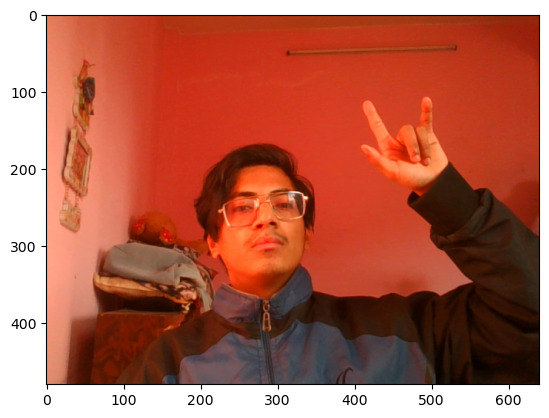

In [63]:
# visualizing the last image/frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


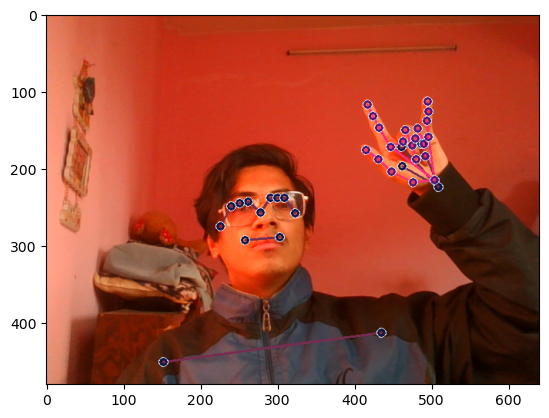

In [64]:
# drawing the landmarks on the frame with styling
drawColorfulLandmarks(frame, results)
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

#### Note: There 1662*30 = 49860 total landmarks in each hand gesture so that means 49860 * 3 = 149580 total landmarks from 3 gestures i.e. hello, thanks and iloveyou
#### where, 1662 = Concatenating each keypoint from the pose, face, left and right hands i.e 33*4 + 468 * 3 + 21 * 3 + 21 * 3 = 1662